In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [5]:
def load_model_results(file_name):
    file = np.load(file_name)
    predictions = file["predictions"]
    targets = file["targets"][:, 0]
    pred_mean = file["prediction_mean"]
    pred_std = file["prediction_std"]
    resids = targets - pred_mean

    return predictions, pred_mean, pred_std, targets, resids

model1_file = "../ensembles/seed1_128_0.05_3e-4_0.01/swag_test_uncertainty.npz"
model2_file = "../ensembles/seed2_128_0.05_3e-4_0.01/swag_test_uncertainty.npz"
model3_file = "../ensembles/seed3_128_0.05_3e-4_0.01/swag_test_uncertainty.npz"

model1_preds, model1_pred_mean, model1_pred_std, model1_targets, model1_resids = load_model_results(model1_file)
model2_preds, model2_pred_mean, model2_pred_std, model2_targets, model2_resids = load_model_results(model2_file)
model3_preds, model3_pred_mean, model3_pred_std, model3_targets, model3_resids = load_model_results(model3_file)

combined_predictions = np.concatenate([model1_preds, model2_preds, model3_preds], axis=1)
combined_means = np.mean(combined_predictions, axis=1)
combined_stds = np.std(combined_predictions, axis=1)
assert np.array_equal(model1_targets, model2_targets)
assert np.array_equal(model1_targets, model3_targets)
combined_residuals = model1_targets - combined_means
residual_mean = np.mean(combined_residuals)
residual_std = np.std(combined_residuals)

Text(0, 0.5, 'Density')

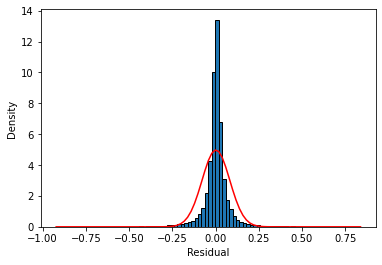

In [8]:
bins = np.arange(np.min(combined_residuals), np.max(combined_residuals)+0.02, 0.02)
plt.hist(combined_residuals, bins=bins, 
         edgecolor='k', linewidth=1.0, density=True);
plt.plot(bins, norm.pdf(bins, residual_mean, residual_std), color="r")
plt.xlabel("Residual")
plt.ylabel("Density")

(0.0, 1.05)

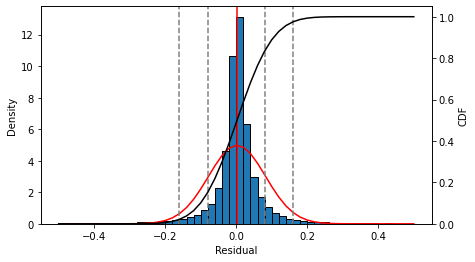

In [62]:
bins = np.arange(-0.5, 0.52, 0.02)
#bins = np.arange(-1.0, 1.02, 0.02)

fix, ax = plt.subplots(1, figsize=(7, 4))
ax.hist(combined_residuals, bins=bins, 
         edgecolor='k', linewidth=1.0, density=True);
ax.plot(bins, norm.pdf(bins, residual_mean, residual_std), color="r")

#plt.plot(np.arange(-0.5, 0.51, 0.005), norm.pdf(np.arange(-0.5, 0.51, 0.005), residual_mean, 0.5*residual_std), color="k")

ax.axvline(residual_std, color='gray', linestyle="--")
ax.axvline(-residual_std, color='gray', linestyle="--")
ax.axvline(2*residual_std, color='gray', linestyle="--")
ax.axvline(-2*residual_std, color='gray', linestyle="--")
ax.axvline(residual_mean, color="r")
ax.set_xlabel("Residual")
ax.set_ylabel("Density")

ax1 = ax.twinx()
ax1.plot(bins, norm.cdf(bins, residual_mean, residual_std), color="k")
ax1.set_ylabel("CDF")
ax1.set_ylim([0, 1.05])

Text(0.5, 0, 'STD')

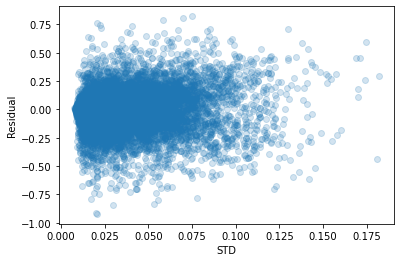

In [33]:
plt.scatter(combined_stds, combined_residuals, alpha=0.2)
plt.ylabel("Residual")
plt.xlabel("STD")

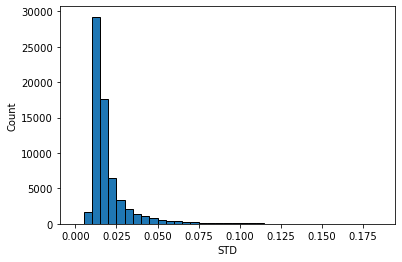

In [76]:
bins = np.arange(0, np.max(combined_stds)+0.005, 0.005)
plt.hist(combined_stds, bins=bins, edgecolor="k");
plt.xlabel("STD");
plt.ylabel("Count");

In [79]:
print(np.min(combined_stds), np.max(combined_stds))

0.0074298529981882576 0.18184988080898914


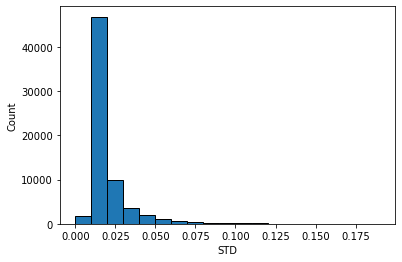

In [83]:
bins = np.arange(0, np.max(combined_stds)+0.01, 0.01)
plt.hist(combined_stds, bins=bins, edgecolor="k");
plt.xlabel("STD");
plt.ylabel("Count");